<a href="https://colab.research.google.com/github/lcduquev/Analisis-Numerico/blob/master/Problem_3_Steepest_Descent_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 3
Find the minimum and maximum points of $$
f(x_1, x_2) = (x_1^2 + x_2^2 - 1)^2 + (x_2^2 - 1)^2 
$$

### Steepest Descent Method

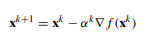

##Definición de la función a minimizar y su gradiente

In [119]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import sympy as sp

In [120]:
def f(x1,x2):
    return (x1**2+x2**2-1)**2 + (x2**2-1)**2

In [125]:
def fn(x1,x2):
    return - (x1**2+x2**2-1)**2 - (x2**2-1)**2

In [126]:
def grad(x1,x2): 
    return np.array([4*x1*(x1**2+x2**2-1), 
                     8*x2**3+4*x1**2*x2-8*x2])

In [127]:
def grad_fn(x1,x2): 
    return np.array([-4*x1*(x1**2+x2**2-1), 
                     -8*x2**3-4*x1**2*x2+8*x2])

## Programación de los métodos

### Gradiente desendiente paso optimizado

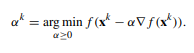

In [101]:
def gd1(x, f, grad, a, max_iter): #Gradiente desendiente paso optimizado
  xs = np.zeros((1 + max_iter, 2))
  xs[0,:] = x

  for i in range(max_iter):
    g = grad(x[0],x[1])
    def phi(s):
      return f(x[0]-s*g[0],x[1]-s*g[1])

    a = optimize.fminbound(phi, 0, 10)

    x = x - a * g
    xs[i+1,:] = x

    tol = abs(f(xs[i+1,0],xs[i+1,1])-f(xs[i,0],xs[i,1]))/max(1,abs(f(xs[i,0],xs[i,1])))
    if tol < epsi:
      break
  return xs,i+1

### Gradiente desendiente paso fijo

In [102]:
def gd2(x, grad, a, max_iter, epsi): #Gradiente desendiente paso fijo    
  xs = np.zeros((1 + max_iter, 2))
  xs[0,:] = x

  for i in range(max_iter):
      x = x - a * grad(x[0],x[1])
      xs[i+1,:] = x

      #tolerancia: criterio de finalización
      tol = abs(f(xs[i+1,0],xs[i+1,1])-f(xs[i,0],xs[i,1]))/max(1,abs(f(xs[i,0],xs[i,1])))
      if tol < epsi: #en caso tal de no encontrar un optimo finalizar con el algoritmo
        break
  return xs,i+1

## Solución

### Para encontrar el mínimo:

In [137]:
x = np.array([4,8])
epsi = 0.001
max_iter = 10000

In [138]:
res1 = gd1(x, f, grad, epsi, max_iter)
xs1 = res1[0]
i1 = res1[1]

El mínimo global es:  -0.10914710950123585 0.9970633521654404


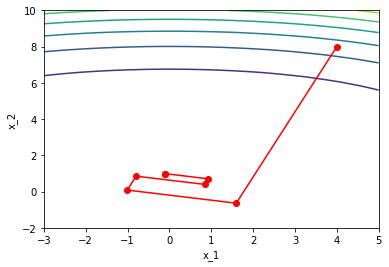

In [139]:
xx = np.linspace(-3, 5)
yy = np.linspace(-2, 10)
X, Y = np.meshgrid(xx, yy)
Z = (X**2+Y**2-1)**2 + (Y**2-1)**2
function = f(xs1[0:i1+1,0],xs1[0:i1+1,1])
dec = np.flip(function)
c = plt.contour(X, Y, Z)
plt.plot(xs1[0:i1+1,0],xs1[0:i1+1,1],'-ro')
plt.xlabel('x_1')
plt.ylabel('x_2')
print("El mínimo global es: ",xs1[i1,0],xs1[i1,1])
#print(function)
#print(dec)

Text(0, 0.5, 'f(x)')

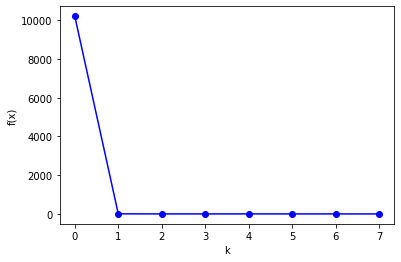

In [108]:
plt.plot(f(xs1[0:i1+1,0],xs1[0:i1+1,1]),'-bo')
plt.xlabel('k')
plt.ylabel('f(x)')

### Para encontrar el máximo:

In [134]:
res1 = gd1(x, fn, grad_fn, epsi, max_iter)
xs1 = res1[0]
i1 = res1[1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/scipy/optimize/optimize.py:1814: RuntimeWarning: invalid value encountered in double_scalars
  r = (xf - nfc) * (fx - ffulc)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/optimize.py:1815: RuntimeWarning: invalid value encountered in double_scalars
  q = (xf - fulc) * (fx - fnfc)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avo

Se han truncado las últimas 5000 líneas del flujo de salida.
NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result enc

El máximo global es:  nan nan


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in square
  


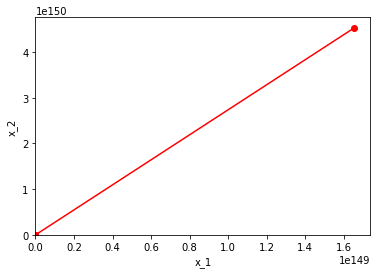

In [136]:
xx = np.linspace(-3, 5)
yy = np.linspace(-2, 10)
X, Y = np.meshgrid(xx, yy)
Z = -((X**2+Y**2-1)**2 + (Y**2-1)**2)
function = f(xs1[0:i1+1,0],xs1[0:i1+1,1])
dec = np.flip(function)
c = plt.contour(X, Y, Z)
plt.plot(xs1[0:i1+1,0],xs1[0:i1+1,1],'-ro')
plt.xlabel('x_1')
plt.ylabel('x_2')
print("El máximo global es: ",xs1[i1,0],xs1[i1,1])

### (b) Con gradiente desendiente de paso fijo



In [ ]:
x = np.array([2,3])
max_iter = 10000
epsi = 0.001 #tolerancia
a = 0.9 #tamaño de paso fijo

In [ ]:
res2 = gd2(x, grad, a, max_iter,epsi)
xs2 = res2[0]
i2 = res2[1]

In [ ]:
xx = np.linspace(-2, 1.75)
yy = np.linspace(-2, 3.5)
X, Y = np.meshgrid(xx, yy)
Z = (X**2+Y**2-1)**2 + (Y**2-1)**2
function = f(xs2[0:i2+1,0],xs2[0:i2+1,1])
c = plt.contour(X, Y, Z)
plt.plot(xs2[0:i2+1,0],xs2[0:i2+1,1] , '-ro')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
print(xs2[i2,0],xs2[i2,1]) #imprimir los valores mínimos encontrados para x1 y x2

In [ ]:
#graficamos los pasos
plt.plot(f(xs2[0:i2+1,0],xs2[0:i2+1,1]),'-bo')
plt.xlabel('k')
plt.ylabel('f(x)')